# (Ford GoBike System Data Exploration)
## by (Mohamed Sayed Elaraby)

## Preliminary Wrangling

GoBike Data is a dataset for bike trips happened on Febraury 2018, Each trip is anonymized and includes:-

{ Trip Duration (seconds), Start Time and Date, End Time and Date, Start Station ID, Start Station Name, Start Station Latitude
Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID and
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) }.

data source: https://www.lyft.com/bikes/bay-wheels/system-data

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [23]:
df= pd.read_csv('Ford GoBike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


## Data Assessing

> In this section, we will check the data, if it is clean or need more pre-processing steps.

In [24]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106718 entries, 0 to 106717
Data columns (total 14 columns):
duration_sec               106718 non-null int64
start_time                 106718 non-null object
end_time                   106718 non-null object
start_station_id           106718 non-null int64
start_station_name         106718 non-null object
start_station_latitude     106718 non-null float64
start_station_longitude    106718 non-null float64
end_station_id             106718 non-null int64
end_station_name           106718 non-null object
end_station_latitude       106718 non-null float64
end_station_longitude      106718 non-null float64
bike_id                    106718 non-null int64
user_type                  106718 non-null object
bike_share_for_all_trip    106718 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 11.4+ MB


In [25]:
df[['start_time','end_time']]= df[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df['user_type']= df['user_type'].astype('category')

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

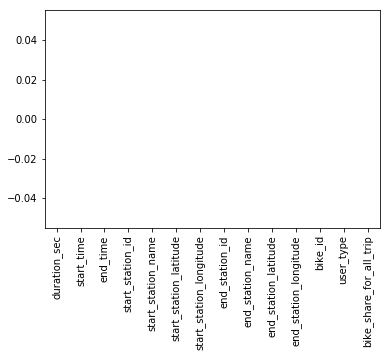

In [26]:
# check if the data have missing values
nan_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(x= nan_counts.index.values, y= nan_counts, color = base_color)
plt.xticks(rotation=90);
nan_counts

In [27]:
#let`s check for duplicates
df.duplicated().sum()

0

In [28]:
df.shape

(106718, 14)

### What is the structure of your dataset?

> the dataset contains 106718 rows and 14 columns

### What is/are the main feature(s) of interest in your dataset?

> I`m interested in duration to see the average duration of biking, user_type (customer, subscriber) and start station to see the most visited stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think start time will be used to analyse time based events, user_type, duration_sec and station names but longitude and latitude out of my analysis.  

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

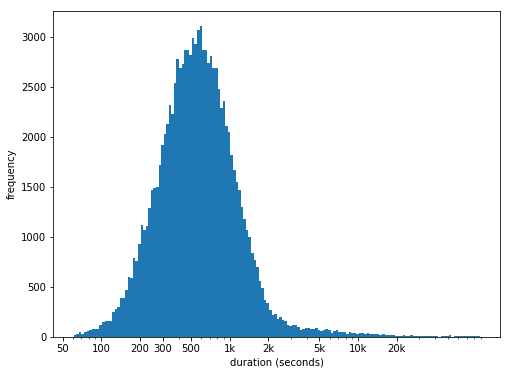

In [29]:
# let`s explore the distribution of duration varible using histogram
plt.figure(figsize=[8,6])
bins= 10** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+0.02, 0.02)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([50,100,200,300,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,200,300,500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration (seconds)')
plt.ylabel('frequency');

it seems to be normally distributed, the most common values almost in the range of 200:2K seconds.

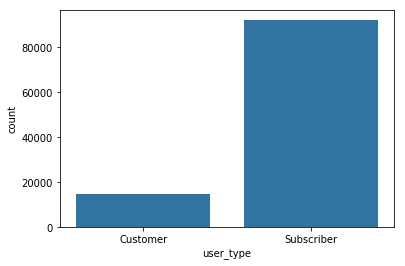

In [30]:
# let`s explore the distribution of user_type varible using bar chart
base_color= sb.color_palette()[0]
sb.countplot(data=df, x='user_type',color=base_color);

we noticed that the Subscriber type is the most common type.

### let`s get some insights from start time

In [31]:
# we will extract month, dayofweek, hour from the start_time
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_day_week,start_hour
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,Feb,Wed,23
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,Feb,Wed,23
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,Feb,Wed,18
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,Feb,Wed,18
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,Feb,Wed,23


refrence https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior

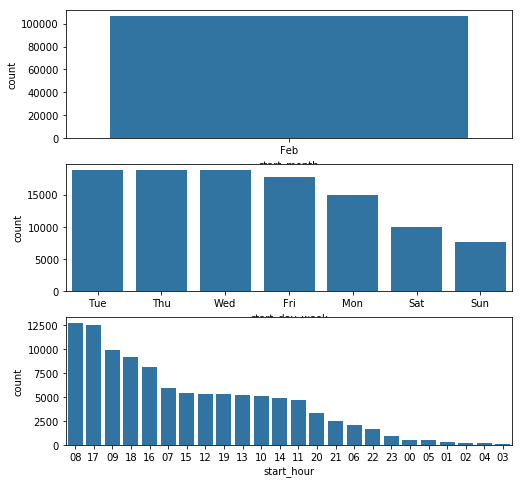

In [32]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_month', color = default_color, order=df.start_month.value_counts().index, ax = ax[0])
sb.countplot(data = df, x = 'start_day_week', color = default_color, order=df.start_day_week.value_counts().index, ax = ax[1])
sb.countplot(data = df, x = 'start_hour', color = default_color, order=df.start_hour.value_counts().index, ax = ax[2]);

from above figures we can see that:-

1- all data happened at February month.

2- Tuesday, Thursday, Wednesday almost equal and have the most bikers.

3- 8 AM, 5 PM is the most hours have bikers. 

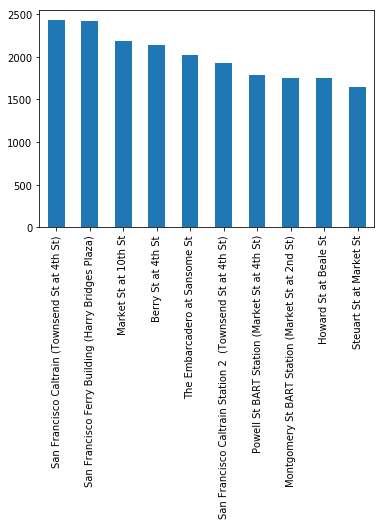

In [33]:
# the most 10 start station
df.start_station_name.value_counts(sort=True, ascending=False)[:10].plot(kind='bar');

the most 10 start station with bikers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

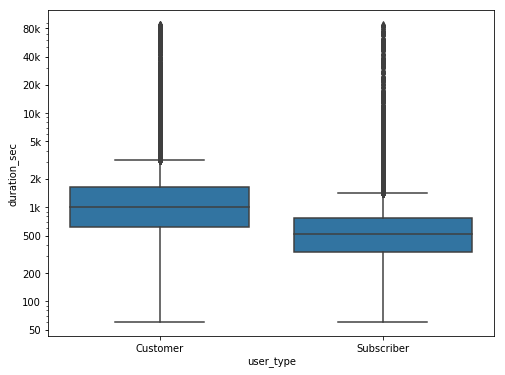

In [34]:
# let`s explore the relationship between duarion and user_type using boxplot 
plt.figure(figsize=[8,6])
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

- although the number of subscriber is greater than number of customer, the average customer duration is higher than subscriber.

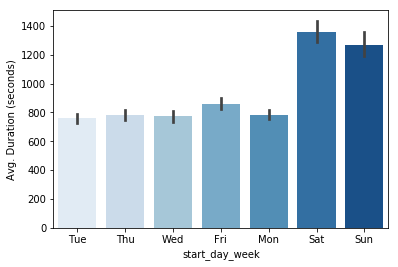

In [35]:
sb.barplot(data = df, x = 'start_day_week', y = 'duration_sec', palette='Blues',order=df.start_day_week.value_counts().index)
plt.ylabel('Avg. Duration (seconds)');

- Saturday and Sunday have the most average duration.

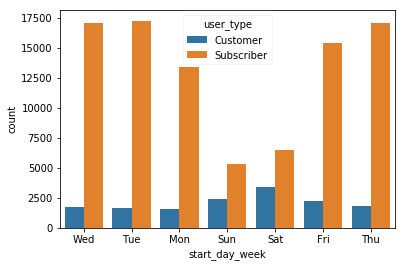

In [36]:
# let`s explore the relation between user_type and day of week using 
ax = sb.countplot(data = df, x = 'start_day_week', hue = 'user_type')
ax.legend(loc = 9, framealpha = 0.2, title = 'user_type');

- Saturday has the most bikers in customer type
- Tuesday, Wedensday, Thursday has the most bikers in subscriber type

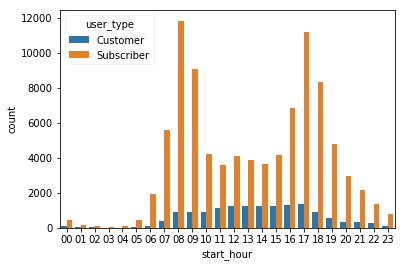

In [37]:
# let`s explore the relation between user_type and hour of day
ax = sb.countplot(data = df, x = 'start_hour', hue = 'user_type')
ax.legend(loc = 2, framealpha = 0.2, title = 'user_type');

- 12 PM, 3 PM, 4 PM, 5 PM has the most bikers in customer type.
- 8 AM and 5 PM has the most bikers in subscriber type.

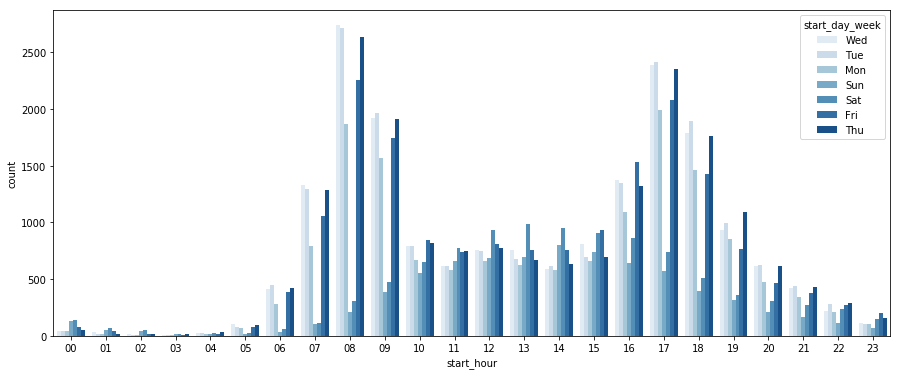

In [38]:
#let`s explore the relationship between day of week and hour of day
plt.figure(figsize=[15,6])
sb.countplot(data = df, x = 'start_hour', hue = 'start_day_week', palette = 'Blues');

- Wedensday and Thursday 8 AM have the most bikers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

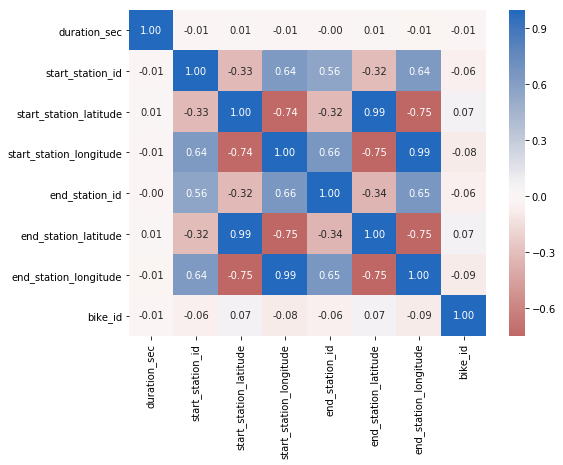

In [39]:
plt.figure(figsize=[8,6])
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

- there are linear (positive, negative) relationship between some features like (start_station_longitude, end_station_station_longitude) and (start_station_id, end_station_longitude) but have no meaning

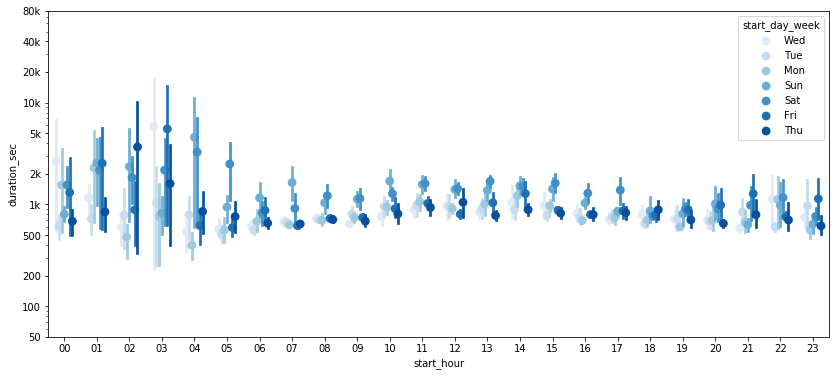

In [48]:
plt.figure(figsize=[14,6])
sb.pointplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'start_day_week',
             dodge = 0.5, linestyles = "",palette='Blues')
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

- Friday and Thursday have the most bikers than other days of week.
- Wedensday 3 AM has the most duration.

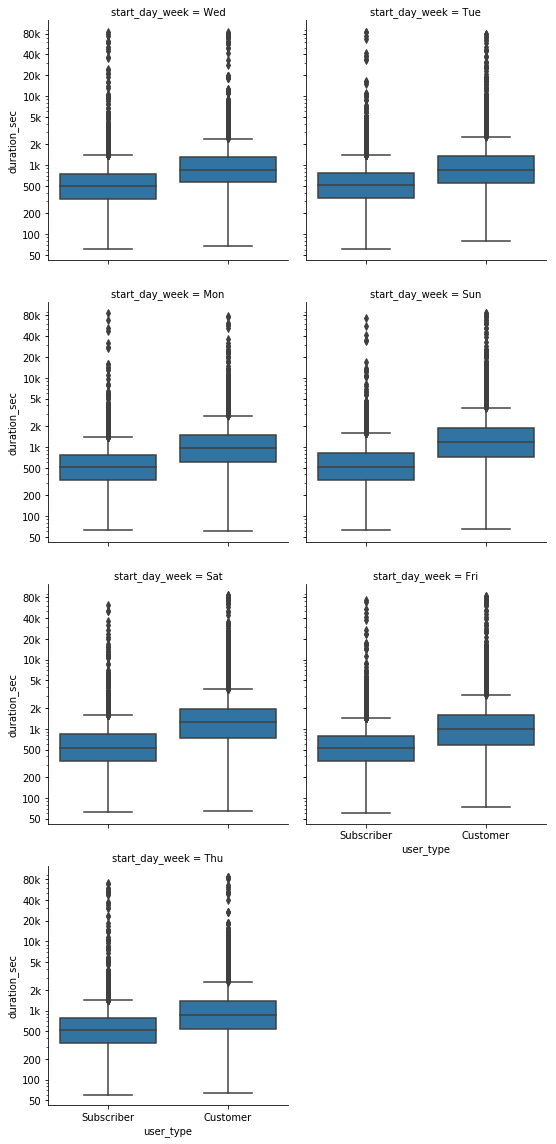

In [53]:
g = sb.FacetGrid(data = df, col = 'start_day_week',col_wrap=2, height = 4)
g.map(sb.boxplot, 'user_type', 'duration_sec',order=df.user_type.value_counts().index)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

- during all days of week the median (duration) of customer type is higher than the median (duration) of subscriber type

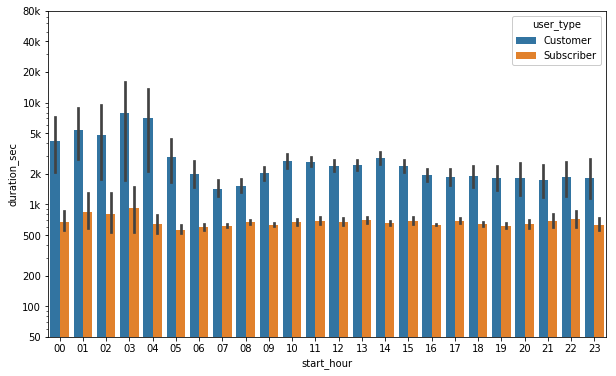

In [58]:
plt.figure(figsize=[10,6])
ax = sb.barplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

- for customer type 3 AM, 4 AM the duration of biking is longer than any hour.
- for subscriber type 2 AM, 3 AM the duration of biking is longer than any hour